In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import os

In [22]:
# Read dataset
df = pd.read_csv('archive/eda_data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['Job Description'], inplace=True)
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,...,47,1,0,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,...,36,1,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,...,10,1,0,1,0,1,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,...,55,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,...,22,1,0,0,0,1,data scientist,na,2728,3


In [23]:
df.shape

(742, 31)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Rating             742 non-null    float64
 3   Company Name       742 non-null    object 
 4   Location           742 non-null    object 
 5   Headquarters       742 non-null    object 
 6   Size               742 non-null    object 
 7   Founded            742 non-null    int64  
 8   Type of ownership  742 non-null    object 
 9   Industry           742 non-null    object 
 10  Sector             742 non-null    object 
 11  Revenue            742 non-null    object 
 12  Competitors        742 non-null    object 
 13  hourly             742 non-null    int64  
 14  employer_provided  742 non-null    int64  
 15  min_salary         742 non-null    int64  
 16  max_salary         742 non

In [25]:
df.dtypes

Job Title             object
Salary Estimate       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
hourly                 int64
employer_provided      int64
min_salary             int64
max_salary             int64
avg_salary           float64
company_txt           object
job_state             object
same_state             int64
age                    int64
python_yn              int64
R_yn                   int64
spark                  int64
aws                    int64
excel                  int64
job_simp              object
seniority             object
desc_len               int64
num_comp               int64
dtype: object

In [26]:
for i in df.select_dtypes(include=['object']).columns:
    print(df[i].value_counts())
    print("***"*25)

Data Scientist                     131
Data Engineer                       53
Senior Data Scientist               34
Data Analyst                        15
Senior Data Engineer                14
                                  ... 
Data Scientist/ML Engineer           1
Sr. Data Scientist                   1
Data Engineer 4 - Contract           1
Data Analyst - Asset Management      1
Machine Learning Engineer (NLP)      1
Name: Job Title, Length: 264, dtype: int64
***************************************************************************
$49K-$113K (Glassdoor est.)         6
$86K-$143K (Glassdoor est.)         6
$54K-$115K (Glassdoor est.)         6
$21-$34 Per Hour(Glassdoor est.)    6
$74K-$124K (Glassdoor est.)         5
                                   ..
$74K-$119K (Glassdoor est.)         1
$55K-$97K (Glassdoor est.)          1
$15K-$16K(Employer est.)            1
$61K-$106K (Glassdoor est.)         1
$62K-$113K (Glassdoor est.)         1
Name: Salary Estimate, Length: 416

In [27]:
df = df.replace([-1, "-1", "Unknown", "Unknown / Non-Applicable", "na"], np.nan)


Missing/Unknown Values:
 Job Title              0
Salary Estimate        0
Rating                11
Company Name           0
Location               0
Headquarters           1
Size                  10
Founded               50
Type of ownership      2
Industry              10
Sector                10
Revenue              204
Competitors          460
hourly                 0
employer_provided      0
min_salary             0
max_salary             0
avg_salary             0
company_txt            0
job_state              0
same_state             0
age                   50
python_yn              0
R_yn                   0
spark                  0
aws                    0
excel                  0
job_simp             184
seniority            520
desc_len               0
num_comp               0
dtype: int64


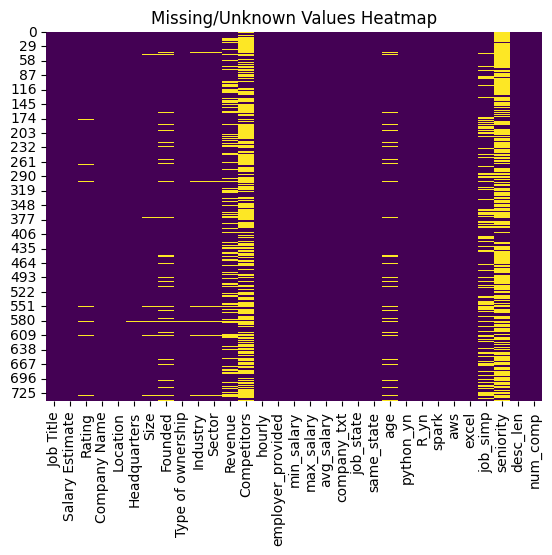

In [28]:
print("\nMissing/Unknown Values:\n", df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing/Unknown Values Heatmap")
plt.show()

In [29]:
df.duplicated().sum()

275

In [30]:
print(df.shape)

(742, 31)


In [31]:
df.drop_duplicates(inplace=True)

In [32]:
print(df.shape)

(467, 31)


In [33]:
x=df.drop(columns=[
        'Job Title', 'Salary Estimate',
        'Company Name', 'Location', 'Headquarters', 'Competitors',
        'company_txt', 'min_salary', 'max_salary', 'avg_salary'
    ]
)
x.head()
y=df['avg_salary']


import statsmodels.api as sm

def forward_selection_bic(X, y):
    print("--- Forward selection by BIC ---")
    
    remaining_features = list(X.columns)
    remaining_features.remove('const') 
    
    selected_features = ['const']
    
    current_best_bic = sm.OLS(y, X[selected_features]).fit().bic
    print(f"Base model (with intercept): BIC = {current_best_bic:.2f}")

    while remaining_features:
        best_feature_to_add = None
        best_new_bic = current_best_bic 

        for feature in remaining_features:
            model_features = selected_features + [feature]
            try:
                model = sm.OLS(y, X[model_features]).fit()
                new_bic = model.bic
            except Exception as e:
                continue
            
            if new_bic < best_new_bic:
                best_new_bic = new_bic
                best_feature_to_add = feature
        
        if best_feature_to_add:
            selected_features.append(best_feature_to_add)
            remaining_features.remove(best_feature_to_add)
            current_best_bic = best_new_bic
            print(f"  + Add '{best_feature_to_add}', the new BIC = {current_best_bic:.2f}")
        else:
            print("\nStop with no better attribute.")
            break
            
    print("\n--- Done! ---")
    return selected_features



In [34]:
print(x.shape)

(467, 21)


In [35]:
# x_train, x_test, y_train, y_test = train_test_split(
#     x, y, test_size=0.2, random_state=42
# )
# 60% train, 20% validation, 20% test

x_trainval, x_test, y_trainval, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42
)
x_train, x_val, y_train, y_val = train_test_split(
    x_trainval, y_trainval, test_size=0.25, random_state=42
)
# copies avoid SettingWithCopy warnings
x_train = x_train.copy()
x_val = x_val.copy()
x_test = x_test.copy()

num_cols = x_train.select_dtypes(include='number').columns
imputer = SimpleImputer(strategy='mean')
imputer.fit(x_train[num_cols])

x_train.loc[:, num_cols] = imputer.transform(x_train[num_cols])
x_val.loc[:, num_cols] = imputer.transform(x_val[num_cols])
x_test.loc[:, num_cols] = imputer.transform(x_test[num_cols])

cat_cols = x_train.select_dtypes(include='object').columns
x_train = pd.get_dummies(x_train, columns=cat_cols, drop_first=True)
x_val = pd.get_dummies(x_val, columns=cat_cols, drop_first=True)
x_test = pd.get_dummies(x_test, columns=cat_cols, drop_first=True)

# align validation/test columns with the training design matrix
x_val = x_val.reindex(columns=x_train.columns, fill_value=0)
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

X_train_const = sm.add_constant(x_train, has_constant='add')
selected_features = forward_selection_bic(X_train_const, y_train)

print("\nCác cột được chọn:")
print(selected_features)

selected_cols = [f for f in selected_features if f != 'const']

x_train_sel = x_train[selected_cols]
x_val_sel   = x_val[selected_cols]
x_test_sel  = x_test[selected_cols]


os.makedirs('archive/train', exist_ok=True)
os.makedirs('archive/val', exist_ok=True)
os.makedirs('archive/test', exist_ok=True)

x_train_sel.to_csv('archive/train/x_train.csv', index=False)
x_val_sel.to_csv('archive/val/x_val.csv', index=False)     # ensure
x_test_sel.to_csv('archive/test/x_test.csv', index=False)
y_train.to_csv('archive/train/y_train.csv', index=False)
y_val.to_csv('archive/val/y_val.csv', index=False)   # ensure archive/val exists
y_test.to_csv('archive/test/y_test.csv', index=False)

--- Forward selection by BIC ---
Base model (with intercept): BIC = 2764.25
  + Add 'job_simp_data scientist', the new BIC = 2728.72

C:\Users\DMX\AppData\Local\Temp\ipykernel_30780\969022532.py:21: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x_train.loc[:, num_cols] = imputer.transform(x_train[num_cols])
C:\Users\DMX\AppData\Local\Temp\ipykernel_30780\969022532.py:22: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x_val.loc[:, num_cols] = imputer.transform(x_val[num_cols])
C:\Users\DMX\AppData\Local\Temp\ipykernel_30780\969022532.py:23: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a n


  + Add 'hourly', the new BIC = 2709.52
  + Add 'job_state_CA', the new BIC = 2696.58
  + Add 'Industry_Biotech & Pharmaceuticals', the new BIC = 2683.83
  + Add 'job_simp_data engineer', the new BIC = 2670.64
  + Add 'employer_provided', the new BIC = 2660.70
  + Add 'job_simp_director', the new BIC = 2656.87
  + Add 'Industry_Colleges & Universities', the new BIC = 2652.31
  + Add 'aws', the new BIC = 2650.33
  + Add 'job_state_NJ', the new BIC = 2649.21
  + Add 'Revenue_$10+ billion (USD)', the new BIC = 2649.00
  + Add 'Industry_Enterprise Software & Network Solutions', the new BIC = 2647.71
  + Add 'job_state_CT', the new BIC = 2646.24

Stop with no better attribute.

--- Done! ---

Các cột được chọn:
['const', 'job_simp_data scientist', 'hourly', 'job_state_CA', 'Industry_Biotech & Pharmaceuticals', 'job_simp_data engineer', 'employer_provided', 'job_simp_director', 'Industry_Colleges & Universities', 'aws', 'job_state_NJ', 'Revenue_$10+ billion (USD)', 'Industry_Enterprise Soft

In [36]:
# X_with_const = sm.add_constant(x_train, has_constant='add')

# y=y_train
# y.head()

# final_selected_features = forward_selection_bic(X_with_const, y)

# print(f"\n========================================================")
# print(f"Best attributes:")
# print(f"========================================================")
    
# for f in final_selected_features:
#     print(f)

# features_to_keep = [f for f in final_selected_features if f != 'const']

# x = x[features_to_keep]

In [37]:
# imputer=SimpleImputer(missing_values=np.nan, strategy='mean')

# imputer.fit(x.select_dtypes(include='number'))
# x.loc[:, x.select_dtypes(include='number').columns] = imputer.transform(x[x.select_dtypes(include='number').columns])
# x

In [38]:
# categorical_features = x.select_dtypes(include=['object']).columns
# dummy=pd.get_dummies(x, columns=categorical_features, drop_first=True)
# dummy

In [39]:
# x_train,x_test,y_train,y_test=train_test_split(dummy,y,test_size=0.2,random_state=42)
# x_train.to_csv("archive/train/x_train.csv", index=False)
# x_test.to_csv("archive/test/x_test.csv", index=False)
# y_train.to_csv("archive/train/y_train.csv", index=False)
# y_test.to_csv("archive/test/y_test.csv", index=False)